<a href="https://colab.research.google.com/github/MLJCUnito/ProjectX2020/blob/master/HowToTackleAMLCompetition/Lecture1%7CFeatureProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 1: Feature Processing**
(Author: Simone Azeglio, simone.azeglio@edu.unito.it)

---
---

## **Overview**

* [Practical Gradient Descent](#section1)
    * [Macro, Meso, Micro-scale in Science](#section1.1)
    * [Scaling in Data Science](#section1.2)
    * [Preprocessing Data](#section1.3)

* [Feature Engineering](#section2)
    * [Feature Importance](#section2.0)
    * [Feature Selection](#section2.1)
    * [Feature Extraction](#section2.2)
    * [Feature Construction](#section2.3)

* [Discerning between different kinds of features](#section3)

* [Handling missing values](#section4)

* [References & Additional Material](#section5)

---
---

<a id='section1'></a>
## **Practical Gradient Descent**
In this first part, we'd like to tell you about some practical tricks for making **gradient descent** work well, in particular, we're going to delve into feature scaling. As an introductory view, it seems reasonable to try to depict an intuition of the concept of *scale*. 

<a id='section1.1'></a>
### **Macro, Meso, Micro-scale in Science**

As scientists, we are well aware of the effects of using a specific measurement tool in order to characterize some quantity and describe reality. As an ideal example we consider the **length scale**. 

<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.0.png" width="500" height="300">

We can identify three different points of view: *microscopic*, *mesoscopic* and *macroscopic*; which are intimately related to the adopted lenght scale. 

We usually deal with the *macroscopic scale* when the observer is in such a position (pretty far, in terms of distance), with respect to the object, that she/he can describe its global characteristics. Instead, we do refer to the *microscopic scale* when the observer is so close to the object that she/he can describe its atomistic details or elementary parts (e.g. molecules, atoms, quarks). Last but not least, we talk about *mesoscopic scale* everytime we are in between micro and macro. 

These definitions are deliberately vague, since delineating a precise and neat explanation would be higly difficult and complex, and it's actually far from our purposes. 

On the other side, this kind of introduction is quite useful, we should take a few minutes to think about the "active" role of the observer and about the fact that, to be honest, for every length scale, there's some specific theory, i.e. there's no global theory for a multi-scale description of some phenomenon. 

<a id='section1.2'></a>
### **Scaling in Data Science**

If our beloved observer (i.e. the scientist) has some kind of "privilege", i.e. choosing the right measurement tool, which is nothing but choosing the right scale in the description of some phenomenon, we can't really say the same for a data scientist. 

It's a sort of paradox, but a data scientist can't really deal with data retrieval most of the times. Because of that, a data scientist is often left alone in front of data, without even knowing from which measurement tool they're coming from. There's no way to interact with the length scale for example. 

Is there something that we can do about it? The only thing we can do is assuming that features are independent and scale these features in order to have something compatible from one to the other. This procedure is called **feature scaling**, and soon we'll understand why it is useful even for ML algorithms, such as gradient descent. 

<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.1.png" width="500" height="300">

If you make sure that features are on similar scales, i.e. features take on similar range of values, then gradient descent can converge more quickly. 

More concretely, let's say we have a problem with two features where $x_1$ is the length of a football field and take values between $90$ (meters) and $115$ (meters) and $x_2$ is the radius of a ball which takes values between $10.5* 10^{-2}$ (meters) to $11.5* 10^{-2}$ (meters). If you plot the countours of the cost function $J(\omega)$ then you might get something similar to the *left plot*, and because of these very skewed elliptical shape, if we run gradient descent on this cost function, it may end up taking a long time and oscillating back and forth before reaching the global minimum. 

In these settings, as stated previously, a useful thing to do is to scale the features. Generally, the idea is to get every feature into approximately a $-1$ to $+1$ range. By doing this, we get the *right plot*. In this way, you can find a much more direct path to the global minimum rather than taking a much more convoluted path where you're sort of trying to follow a very complicated trajectory. 

<a id='section1.3'></a>
### **Preprocessing Data**

> In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed, or *encoded*, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.

We're going to dive into Scikit-Learn for this section and exploit its powerful *processing* package. 

We've been talking about scaling our data, now it's time to understand how to put our hands on code and try to do that. Usually, as previously stated, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers might be more appropriate. (Take a look at [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py), you'll see the behaviors of the different scalers, transformers and normalizers with outliers). 

### Standardization 

Many Machine Learning estimators require *standardization* of datasets, elseways they might behave badly because data are far from a Gaussian (with zero mean and unit variance) distribution. 

Most of the times, we ignore the shape of the distribution and just transform the data by subtracting the mean value of each feature, then scale by dividing features by their standard deviation. 

*Do you have in mind some models that assume that all features are centered around zero and have variance in the same order of magnitude? Can you think about possible issues related to the objective function in these cases?* 

---

<ins>Answer</ins>:  many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

---

There's a fast way to do that on a 1-D array, by means of the *scale* function


In [3]:
from sklearn import preprocessing
import numpy as np
X_train = np.random.randint(5, size = 10)
X_scaled = preprocessing.scale(X_train)

print(X_scaled)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 1.6583124   0.15075567  1.6583124  -0.60302269 -1.35680105  0.15075567
  0.15075567  0.15075567 -1.35680105 -0.60302269]
-4.4408920985006264e-17
0.9999999999999999


The *preprocessing* module provides a utility class *StandardScaler* that compute the mean and std on a training set so as to be able to later reapply the same transform on the test set. 

(You should be well aware of what [*sklearn.pipeline.Pipeline*](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) is, it's crucial for strategies' deployment.)




---
---

<a id='section2'></a>
## **Feature Engineering**

The real deal is that nobody explicitly tells you what **feature engineering** is, in some way, you are expected to understand for yourself what are good features.

<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.2.jpg" width="800" height="250">

> Feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success. […] Much of the success of machine learning is actually success in engineering features that a learner can understand. 

>*(Scott Locklin, in “Neglected machine learning ideas”)* 

Let's try to figure out what feature engineering is. 

In solving such problems, our goal is to get the best possible result from a model. In order to achieve that, we need to extract useful information and get the most from what we have. On one side, this includes getting the best possible result from the algorithms we are employing. On the other side, it also involves getting the most out of the available data. 

*How do we get the most out of our data for predictive modeling?* 

Feature engineering tries to find an answer to this question. 

> Actually, the success of all Machine Learning algorithms depends on how you present the data. 

> (*Mohammad Pezeshki, answer to “What are some general tips on feature selection and engineering that every data scientist should know?"*)



<a id='section2.0'></a>
### **Feature Importance**
Feature importance refers to a bunch of techniques that assign a score to input features based on how useful they are at predicting a target variable. These scores play an important role in predictive modeling, they usually provide useful insights into the dataset and the basis for dimensionality reduction and feature selection. 

Feature importance scores can be calculated both for regression and classification problems. 

These scores can be used in a range of situations, such as:
* *Better understanding the data*: the relative scorse can highlight which features may be most relevant to the target, and on the other side, which are least relevant. This could be a useful notion for a domain expert and could be used as a basis for gathering more or different data. 


* *Better understanding a model*: inspecting the importance score provides insights into the specific model we're using and which features are the most important to the model when elaborating a prediction. 


* *Reducing the number of input features*: we can use the importance scores to select those features to delete (lowest score) and those to keep (highest scores). 

Now let's jot down a few lines of code in order to grasp this topic in a better way. 




**<ins> Check Scikit-Learn Version </ins>**


In [5]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


Now, in order to explore feature importance scores, we'll import a few test datasets directly from sklearn. 

**<ins>Classification Dataset</ins>**

Easy peasy, we can use the [*make_classification()*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to create a test binary classification dataset. 

We can specify the number of samples and the number of features, some of them are going to be informative and the remaining redundant. (*Tip*: you should fix the *random seed*, in this way you'll get a reproducible result)


In [29]:
# classification dataset
from sklearn.datasets import make_classification
# define dataset
X_clf, y_clf = make_classification(n_samples=1000, n_features=8, n_informative=3, n_redundant=5, random_state=1)
# summarize the dataset
print(X_clf.shape, y_clf.shape)

(1000, 8) (1000,)


**<ins>Regression Dataset</ins>**

In a parallel fashion, we'll use the [*make_regression()*](https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable.) function to create a regression dataset. 

In [30]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=8, n_informative=3, random_state=1)
# summarize the dataset
print(X_reg.shape, y_reg.shape)

(1000, 8) (1000,)


### Coefficients as Feature Importance 

When we think about linear machine learning algorithms, we always fit a model where the prediction is the weighted sum of the input values (e.g. linear regression, logistic regression, ridge regression etc..) 

These coefficients can be used directly as naive feature importance scores. Firstly we'll fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and create a bar chart to get an idea of the relative importance. 

**<ins>Linear Regression Feature Importance</ins>**

It's time to fit a [*LinearRegression()*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model on the regression dataset and get the *coef_* property that conatins the coefficients. The only assumption is that the input variables have the same scale or have been scaled prior to fitting the model. 

This same approach can be used with regularized linear models, such as Ridge and ElasticNet. 


Feature: 0, Score: -0.00000
Feature: 1, Score: 41.28219
Feature: 2, Score: 0.00000
Feature: 3, Score: 41.81266
Feature: 4, Score: 45.15258
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000


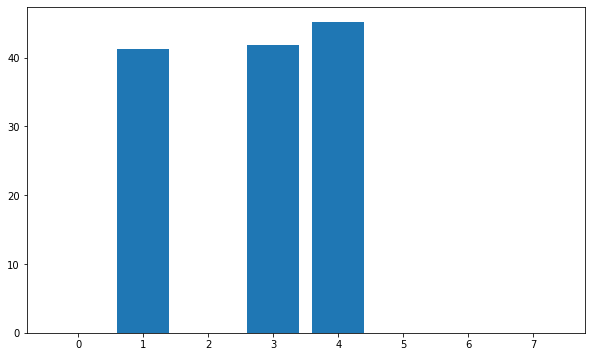

In [8]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
# define the model
model = LinearRegression()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (10,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>Logistic Regression Feature Importance</ins>**

In a similar fashion, we can do the same to fit a [*LogisticRegression()*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model. 

Feature: 0, Score: -1.08328
Feature: 1, Score: 0.35669
Feature: 2, Score: -0.13472
Feature: 3, Score: 0.58331
Feature: 4, Score: -0.40560
Feature: 5, Score: -0.38912
Feature: 6, Score: 0.31175
Feature: 7, Score: -0.88263


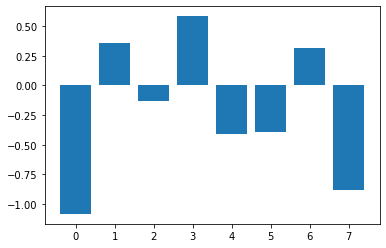

In [9]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_clf, y_clf)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Recall that this is a classification problem with classes 0 and 1 (binary). Notice that the coefficients are both positive and negative, positive scores indicate a feature that predicts class 1 while negative scores indicate a feature that predicts class 0. 

*Why can't we analyze a regression problem with Logistic Regression?* (A pretty naive question, try to answer tho)

### Decision Tree Feature Importance

Decision Tree algorithms like **C**lassification **A**nd **R**egression **T**rees (**CART**) offer importance scores based on the reduction in the criterion used to select split points, like Gini or Entropy. This approach can be also used for ensembles of decision trees, such as Random Forest and Gradient Boositng algorithms. 

We can directly use the CART algorithm for feature importance implemented in Scikit-Learn as the [*DecisionTreeRegressor*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [*DecisionTreeClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

The model provides a *feature_importances_* property that tells us the relative importance scores for each feature. 

**<ins>CART Regression Feature Importance</ins>**


Feature: 0, Score: 0.00394
Feature: 1, Score: 0.27784
Feature: 2, Score: 0.00367
Feature: 3, Score: 0.33327
Feature: 4, Score: 0.37304
Feature: 5, Score: 0.00377
Feature: 6, Score: 0.00273
Feature: 7, Score: 0.00173


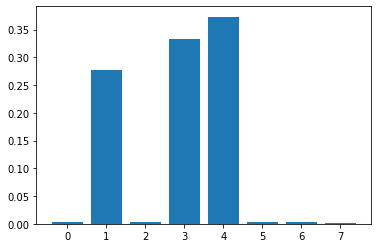

In [10]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


**<ins>CART Classification Feature Importance</ins>**

Feature: 0, Score: 0.61084
Feature: 1, Score: 0.06682
Feature: 2, Score: 0.00798
Feature: 3, Score: 0.08570
Feature: 4, Score: 0.07629
Feature: 5, Score: 0.03331
Feature: 6, Score: 0.01803
Feature: 7, Score: 0.10103


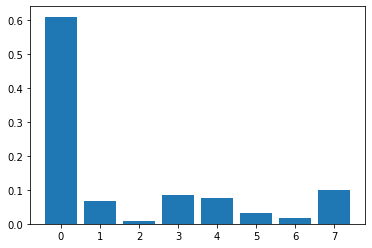

In [11]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_clf, y_clf)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Random Forest Feature Importance

Analogously, we can use the RandomForest algorithm for feature importance implemented in scikit-learn as the [*RandomForestRegressor*](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [*RandomForestClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

As above, the model provides a *feature_importances_* property. 

**<ins>Random Forest Regression Feature Importance</ins>**

Feature: 0, Score: 0.00488
Feature: 1, Score: 0.27663
Feature: 2, Score: 0.00440
Feature: 3, Score: 0.33057
Feature: 4, Score: 0.36924
Feature: 5, Score: 0.00467
Feature: 6, Score: 0.00460
Feature: 7, Score: 0.00501


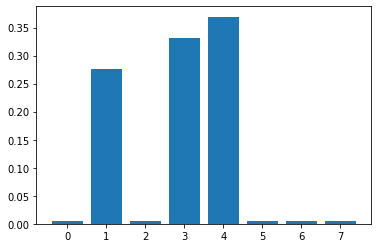

In [12]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>Random Forest Classification Feature Importance</ins>**


Feature: 0, Score: 0.27838
Feature: 1, Score: 0.11923
Feature: 2, Score: 0.07076
Feature: 3, Score: 0.13927
Feature: 4, Score: 0.10233
Feature: 5, Score: 0.10529
Feature: 6, Score: 0.04857
Feature: 7, Score: 0.13616


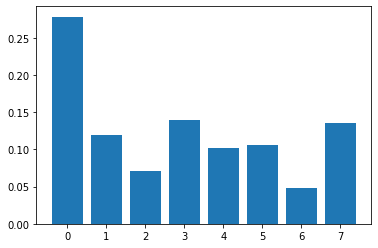

In [13]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_clf, y_clf)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### XGBoost Feature Importance
[XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) is a Python library that provides an efficient implementation of the stochastic gradient boostig algorithm. (For an introduction to Boosted Trees, you can take a look [here](https://xgboost.readthedocs.io/en/latest/tutorials/model.html))

This algorithm can be integrated with Scikit-Learn via the *XGBRegressor* and *XGBClassifier* classes. 

Even in this one, we can find the *feature_importances_* property. 

First, let's install the XGBoost library, with pip:

In [14]:
!pip install xgboost

In [15]:
# Check xgboost version
import xgboost
print(xgboost.__version__)

0.90


Now, let's take a look at an example of XGBoost for feature importance. 

**<ins>XGBoost Regression Feature Importance</ins>**



[21:06:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00057
Feature: 1, Score: 0.25953
Feature: 2, Score: 0.00099
Feature: 3, Score: 0.38528
Feature: 4, Score: 0.34686
Feature: 5, Score: 0.00103
Feature: 6, Score: 0.00437
Feature: 7, Score: 0.00137


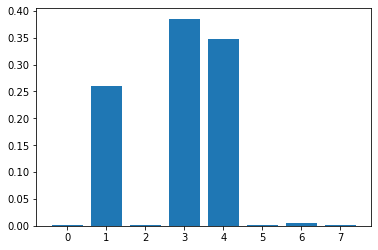

In [16]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>XGBoost Classification Feature Importance</ins>**



Feature: 0, Score: 0.51614
Feature: 1, Score: 0.05840
Feature: 2, Score: 0.08998
Feature: 3, Score: 0.03381
Feature: 4, Score: 0.10906
Feature: 5, Score: 0.08295
Feature: 6, Score: 0.02555
Feature: 7, Score: 0.08412


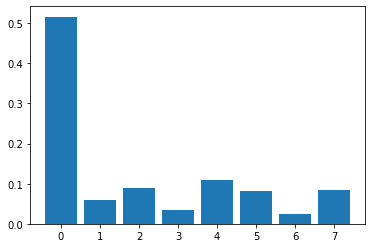

In [17]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
model = XGBClassifier()
# fit the model
model.fit(X_clf, y_clf)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### [Permutation Feature Importance](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used. 
It measures the increase in the prediction error of the model after we permuted the feature's values, which breaks the relationship between the feature and the true outcome.

The concept is really straightforward: We measure the importance of a feature by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is "unimportant" if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction. 

Permutation feature selection can be used via the [*permutation_importance()*](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) function that take a fit model, a dataset and a scoring function. 

Let's try this approach with an algorithm that doesn't support feature selection natively, [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (K-Nearest Neighbors).

**<ins>Permutation Feature Importance for Regression</ins>**


Feature: 0, Score: 39.26371
Feature: 1, Score: 1970.76947
Feature: 2, Score: 32.07404
Feature: 3, Score: 2384.33933
Feature: 4, Score: 2505.48063
Feature: 5, Score: 53.14065
Feature: 6, Score: 64.58060
Feature: 7, Score: 44.49132


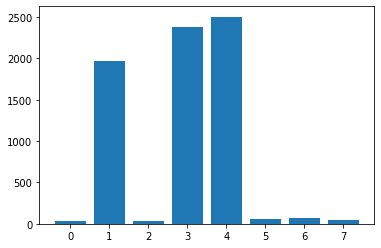

In [18]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt 
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X_reg, y_reg)
# perform permutation importance
results = permutation_importance(model, X_reg, y_reg, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>Permutation Feature Importance for Classification</ins>**

Feature: 0, Score: 0.07960
Feature: 1, Score: 0.02720
Feature: 2, Score: 0.00660
Feature: 3, Score: 0.03100
Feature: 4, Score: 0.11100
Feature: 5, Score: 0.05320
Feature: 6, Score: 0.03720
Feature: 7, Score: 0.06260


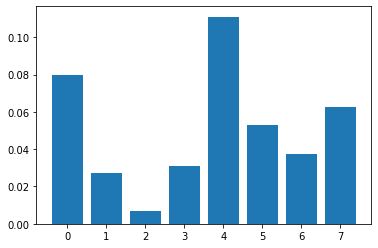

In [19]:
# permutation feature importance with knn for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_clf, y_clf)
# perform permutation importance
results = permutation_importance(model, X_clf, y_clf, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>Feature Selection with Importance</ins>**

Feature importance scores can be used to find useful insights and interpret the data, but they can also be used directly to help rank and select features that are most useful. This procedure is usually referred as *Feature Selection*, and we'll look at it in more detail soon.

In our case, we can show how is possible to find redundant features by using the previously shown techniques. 

Firstly, we can split the dataset into train and test sets, train a model on the training set, make predictions on the test set and evaluate the results by employing classification accuracy. We'll use a Logistic Regression model to fit our data. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 86.67


In this case, we can see that our model achieved a classification accuracy of about $86.67 \%$ using all the features in the dataset. 

Let's see what happens if we select only relevant features. We could use any of the feature importance scores above, but in this case we'll use the ones provided by random forest. 

We can use the [*SelectFromModel*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) class to define both the model abd the number of features to select. 

In [21]:
from sklearn.feature_selection import SelectFromModel
# configure to select a subset of features
fs = SelectFromModel(RandomForestClassifier(n_estimators=200), max_features=5)

This will calculate the importance scores that can be used to rank all input features. We can then apply the method as a transform to select a subset of 5 most important features from the dataset. This transform will be applied to the training set and the test set. 

In [25]:
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

We can wrap up every piece and get this code snippet. 

In [28]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 86.36


In this case, we can see that the model achieves the same performance on the dataset, although with almost half of the features. 

<a id='section2.1'></a>
### **Feature Selection**

> Not all features are created equal

> *Zhe Chen*

There would always be some features which are less important with respect to a specific problem. Those irrelevant features need to be removed. 
*Feature selection* addresses these problems by automatically selecting a subset that are most useful to the problem. 

Most of the times the reduction in the number of input variables shrinks the computational cost of modeling, but sometimes it might happen that it also improves the performance of the model. 

Among the large amount of feature selection methods we'll focus mainly on statistical-based ones. They involve evaluating the relationship between each input variable and the target variable using statistics. These methods are usually fast and effective, the only issue is that statistical measures depends on the data type of both input and output variables. 



<a id='section2.2'></a>
### **Feature Extraction**

<a id='section2.3'></a>
### **Feature Construction**

<a id='section3'></a>
## **Discerning between different kinds of features**

<a id='section4'></a>
## **Handling missing values**
* https://scikit-learn.org/stable/modules/impute.html#impute 

<a id='section5'></a>
## **References & Additional Material** 

**Preprocessing Data**
* https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

**Feature Importance**

* https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Feature Selection**

* https://en.wikipedia.org/wiki/Feature_selection

* https://machinelearningmastery.com/an-introduction-to-feature-selection/ 

* https://machinelearningmastery.com/feature-selection-machine-learning-python/

* https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/